Apr 15, 2019 - smouradi - Code to convert the .bin files provided by Sandia to something more bemsolver-like

In [24]:
import numpy as np
import pickle

In [10]:
fin = 'HOA_trap_v1/RS1096_12400_1.bin'
fout = 'HOA_trap_v1/RS1096_12400_1.pkl'

#from table 5 of HOA manual
electrodeNames = ['GND','RF']+['G'+str(i+1).zfill(2) for i in range(8)]+ \
                            ['L'+str(i+1).zfill(2) for i in range(16)]+ \
                            ['Q'+str(i+1).zfill(2) for i in range(40)]+ \
                            ['T'+str(i+1).zfill(2) for i in range(6)]+ \
                            ['Y'+str(i+1).zfill(2) for i in range(24)]
                
#from table 4 of HOA manual    
with open(fin,'rb') as f:
    
    #header
    raw = f.read(160)
    nElec = np.frombuffer(raw[8:16],np.int64)[0]
    nXYZ = np.frombuffer(raw[16:40],np.int64)
    vSets = np.frombuffer(raw[40:48],np.int64)[0]
    stepSize = np.frombuffer(raw[96:120])*1e3 #step size in mm (=5um)
    origin = np.frombuffer(raw[120:144])*1e3
    roi = np.array([np.array([0,nXYZ[i]-1])*stepSize[i]+origin[i] for i in range(3)])
    
    #electrode mapping
    raw = f.read(8*nElec)
    electrodes = np.frombuffer(raw,np.int64)
    
    #data
    raw = f.read()
    data = np.frombuffer(raw)
    dt = data.reshape(nElec,nXYZ[0]*nXYZ[1]*nXYZ[2])


In [14]:
#making data structure
gridXYZ = [np.linspace(roi[l,0],roi[l,1],nXYZ[l]) for l in range(3)]

trap = {'X':gridXYZ[0],
       'Y':gridXYZ[1],
       'Z':gridXYZ[2]}

for el in range(len(electrodeNames)):
    trap[electrodeNames[el]] = {'name':electrodeNames[el],
               'V':dt[el]}

In [15]:
#from table 1
trap['RF']['position']=[0,0]
trap['Q19']['position']=[0,-1]
trap['Q20']['position']=[0,1]
trap['Q17']['position']=[-70,-1]
trap['Q18']['position']=[-70,1]
trap['Q15']['position']=[-140,-1]
trap['Q16']['position']=[-140,1]
trap['Q13']['position']=[-210,-1]
trap['Q14']['position']=[-210,1]
trap['Q11']['position']=[-280,-1]
trap['Q12']['position']=[-280,1]
trap['Q09']['position']=[-350,-1]
trap['Q10']['position']=[-350,1]
trap['Q07']['position']=[-420,-1]
trap['Q08']['position']=[-420,1]
trap['Q05']['position']=[-490,-1]
trap['Q06']['position']=[-490,1]
trap['Q03']['position']=[-560,-1]
trap['Q04']['position']=[-560,1]
trap['Q01']['position']=[-630,-1]
trap['Q02']['position']=[-630,1]
trap['Q21']['position']=[70,-1]
trap['Q22']['position']=[70,1]
trap['Q23']['position']=[140,-1]
trap['Q24']['position']=[140,1]
trap['Q25']['position']=[210,-1]
trap['Q26']['position']=[210,1]
trap['Q27']['position']=[280,-1]
trap['Q28']['position']=[280,1]
trap['Q29']['position']=[350,-1]
trap['Q30']['position']=[350,1]
trap['Q31']['position']=[420,-1]
trap['Q32']['position']=[420,1]
trap['Q33']['position']=[490,-1]
trap['Q34']['position']=[490,1]
trap['Q35']['position']=[560,-1]
trap['Q36']['position']=[560,1]
trap['Q37']['position']=[630,-1]
trap['Q38']['position']=[630,1]
trap['Q39']['position']=[0,-2]
trap['Q40']['position']=[0,2]


In [16]:
#pick out connected electrodes & save to file

electrodesDAC = ['RF']+['Q'+str(i+1).zfill(2) for i in range(7,33)]+ ['Q39','Q40']
electrodesCENTRAL = ['RF','Q19','Q20','Q39','Q40']

fout = 'HOA_trap_v1/DAConly.pkl'
f = open(fout,'wb')
trap1 = {'X':gridXYZ[0],
       'Y':gridXYZ[1],
       'Z':gridXYZ[2],
        'electrodes':{}}
for e in electrodesDAC:
    trap1['electrodes'][e] = trap[e]
pickle.dump(trap1, f, -1)
f.close() 


fout = 'HOA_trap_v1/CENTRALonly.pkl'
f = open(fout,'wb')
trap1 = {'X':gridXYZ[0],
       'Y':gridXYZ[1],
       'Z':gridXYZ[2],
        'electrodes':{}}
for e in electrodesCENTRAL:
    trap1['electrodes'][e] = trap[e]
pickle.dump(trap1, f, -1)
f.close() 

In [89]:
#reshape into what is needed by old python multipole expansion code

gridXYZ = [np.linspace(roi[l,0],roi[l,1],nXYZ[l]) for l in range(3)]
fullCoords = [[gridXYZ[0][i], gridXYZ[1][j], gridXYZ[2][k]] \
            for i in range(len(gridXYZ[0])) for j in range(len(gridXYZ[1])) for k in range(len(gridXYZ[2]))]
print len(fullCoords)

### save effect of only 28 electrodes initially controlled
electrodes = [1]+range(32,58)+[64,65]

fullData = [gridXYZ[0],gridXYZ[1],gridXYZ[2],[]]

for i in electrodes:
    fullData[3] = np.append(fullData[3],dt[i])

np.savetxt('RS1096_12400_1_28onlyX.txt',fullData[0],delimiter=',')
np.savetxt('RS1096_12400_1_28onlyY.txt',fullData[1],delimiter=',')
np.savetxt('RS1096_12400_1_28onlyZ.txt',fullData[2],delimiter=',')
np.savetxt('RS1096_12400_1_28onlyV.txt',fullData[3],delimiter=',')



183495


In [44]:
c = [ 0.00000000e+00, -2.13440377e+04, -1.44787518e+04, -5.12307279e+03,\
  2.80179096e+04,  6.84794501e+03, -2.27007778e+04,  3.31495204e+04,\
 -2.36620419e+04,  2.42811482e+04, -3.38267558e+04, -9.86873741e+03,\
 -6.42611670e+03,  1.51863075e+00, -2.92870927e+04,  4.16404770e+04,\
 -7.99308246e+03,  1.38009067e+00, -1.09514580e+04,  3.21772730e+04,\
  1.48515280e+04, -1.10462967e+04,  1.29973951e+03,  1.14171247e+04,\
 -1.02590098e+04,  2.46282926e+03, -7.69660343e+03,  8.49701338e+03,\
  1.01360653e+04]


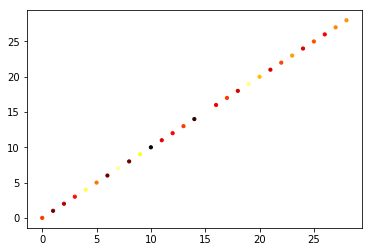

In [48]:
from matplotlib import pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca()
plot = ax.scatter(range(len(c)),range(len(c)),10,c,cmap=cm.hot)

plt.show()